#Determing the optimal number of hidden layer and neuron for an *ANN*

In [2]:
pip install scikeras

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
import pickle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Project/Hyperparametertuning/Churn_Modelling.csv")

In [4]:
data = data.drop(['RowNumber',	'CustomerId','Surname'], axis = 1)

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])


ohe = OneHotEncoder()
geo_encoder = ohe.fit_transform(data[['Geography']])
geo_df = pd.DataFrame(geo_encoder.toarray(), columns = ohe.get_feature_names_out(['Geography']))
geo = pd.concat([data.drop('Geography', axis = 1), geo_df],axis = 1)

X=geo.drop('Exited', axis = 1)
y=geo['Exited']

In [5]:
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.2, random_state = 42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
#saving thefile in pickle

Scaler_path = '/content/drive/MyDrive/Project/Hyperparametertuning/'

with open(Scaler_path + 'scaler.pkl', 'wb') as file:
  pickle.dump(scaler, file)


path = '/content/drive/MyDrive/Project/Hyperparametertuning/'

with open(path + 'le.pkl', 'wb') as file:
  pickle.dump(le, file)

with open(path + 'ohe.pkl', 'wb') as file:
  pickle.dump(ohe, file)



In [7]:
#define a model and create a different model
def create_model(neurons=32, layers=1, input_dim=None):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_dim=input_dim))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [8]:
#create keras classfier

clf = KerasClassifier(
    model=create_model,
    epochs=10,
    batch_size=32,
    verbose=0
)

In [9]:
# Define parameter grid
param_grid = {
    'model__neurons': [16, 32],
    'model__layers': [1, 2],
    'batch_size': [16, 32],
    'epochs': [5]
}

# Tell SciKeras the input dimension
clf.set_params(model__input_dim=X_train.shape[1])

KerasClassifier(
	model=<function create_model at 0x7d94f30b3380>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
	model__input_dim=12
)

In [10]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

print("Best Score:", grid_result.best_score_)
print("Best Params:", grid_result.best_params_)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Best Score: 0.8544998548099718
Best Params: {'batch_size': 16, 'epochs': 5, 'model__layers': 2, 'model__neurons': 32}


as there was an version issue between scikeras, sklearn so i have have to downgrade the sklearn as the scikeras has no upgrade version

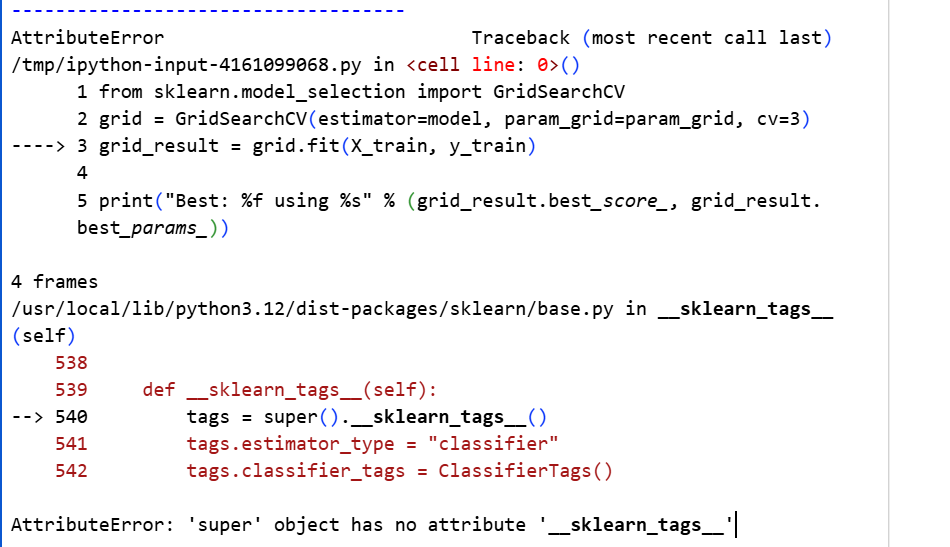